In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)

In [ ]:
num_inputs, num_outputs,num_hiddens=784,10,256
W1 = torch.normal(0,0.01,(num_inputs,num_hiddens),requires_grad=True)
#W1=nn.Parameter(torch.randn(num_inputs,num_hiddens,requires_grad=True)*0.01)
b1=nn.Parameter(torch.zeros(num_hiddens,requires_grad=True))
W2 = torch.normal(0,0.01,(num_hiddens,num_outputs),requires_grad=True)

#W2=nn.Parameter(torch.randn(num_hiddens,num_outputs,requires_grad=True)*0.01)
b2=nn.Parameter(torch.zeros(num_outputs,requires_grad=True))

params=[W1,b1,W2,b2]

## 激活函数


In [ ]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X,a)

In [ ]:
def net(X):
    X=X.reshape((-1,num_inputs))
    H=relu(X@W1+b1) #@表示矩阵乘法
    return(H@W2+b2)

In [ ]:
loss=nn.CrossEntropyLoss()

In [ ]:
num_epochs ,lr=10,0.3
updater=torch.optim.SGD(params,lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,updater)

In [ ]:
d2l.predict_ch3(net,test_iter)

## 实现单层的暂退法函数
从均匀分布中抽取样本，样本数与该层神经网络维度一致，保留大于p的样本

In [2]:
def dropout_layer(X,dropout):  #dropout是概率
    assert 0<= dropout <=1
    if dropout ==1:
        return torch.zeros_like(X)  ##全部丢弃
    if dropout== 0:
        return X
    mask = (torch.rand(X.shape)>dropout).float()##啥意思
    return mask *X /(1.0-dropout)

In [6]:
num_inputs, num_outputs,num_hiddens1,num_hiddens2=784,10,256,256
dropout1,dropout2=0.2,0.5
net=nn.Sequential(nn.Flatten(),
                 nn.Linear(784,256),
                 nn.ReLU(),
                 nn.Dropout(dropout1),#在全连接层之后添加一个Dropout层
                 nn.Linear(256,256),
                 nn.ReLU(),
                 nn.Dropout(dropout2),
                 nn.Linear(256,10)
                 )



In [7]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,std=0.01)
net.apply(init_weights)


Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=256, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=256, out_features=10, bias=True)
)

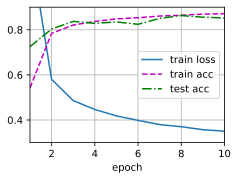

In [8]:
num_epochs,lr,batch_size=10,0.5,256
loss=nn.CrossEntropyLoss()
trainer= torch.optim.SGD(net.parameters(),lr=lr)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

## 权重衰减
在深度学习框架中，权重衰减集成在优化算法中，以便于任何损失函数结合使用。




KeyboardInterrupt: 

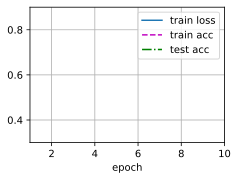

In [11]:
num_epochs,lr,batch_size=10,0.5,256
loss=nn.CrossEntropyLoss()
trainer= torch.optim.SGD([
{"params":net[1].weight,'weight_decay': 1},
{"params":net[1].bias}]  ,lr=lr)
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)